## 글로브(GloVe)
- https://wikidocs.net/22885
- 카운트 기반과 예측 기반을 모두 사용하는 방법론, 임베딩 방법론
- 기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 지적, 보완 목적
- 실제로도 Word2Vec만큼 뛰어난 성능 (두 가지 전부 사용해보고 성능 좋은거 선택할것)

### 기존 방법론에 대한 비판
- LSA: 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론  
    - DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬
    - 단점: 단어 의미의 유추 작업(Analogy task)에는 성능 부족
        - 왕:남자 = 여왕:? (정답은 여자)
- Word2Vec: 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론
     - 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려 (전체적인 통계 정보를 반영x)

### 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
- 단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성
- i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
- 예)
    - I like deep learning
    - I like NLP
    - I enjoy flying
    - 윈도우 크기=1
    - 행렬을 전치해도 동일한 행렬이 된다는 특징
    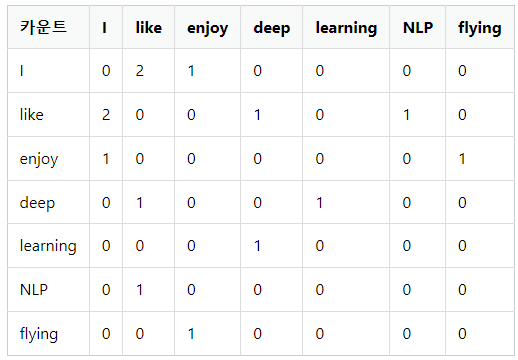

### 동시 등장 확률(Co-occurrence Probability)
- P(k|i): 특정 단어i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
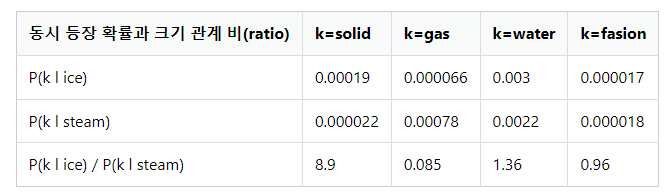

- ice가 등장했을 때 solid(단단한)가 등장할 확률 0.00019은 steam(증기)이 등장했을 때 solid가 등장할 확률인 0.000022보다 약 8.9배 크다
    - P(solid l ice) / P(solid l steam)를 계산한 값은 8.9
- gas는 ice보다는 steam과 더 자주 등장
    - P(gas l ice) / P(gas l steam)를 계산한 값은 1보다 훨씬 작은 값인 0.085
- k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값
- k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값

### 손실 함수(Loss function)
- GloVE의 아이디어: 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것
    - 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표
- 

### GloVe 훈련시키기

In [6]:
pip install glove_python_binary

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glove_python_binary (from versions: none)
ERROR: No matching distribution found for glove_python_binary


In [1]:
import pickle

In [2]:
with open("result.pickle","rb") as fi:
    result = pickle.load(fi) #result 불러오기

In [11]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

ModuleNotFoundError: No module named 'glove'

In [9]:
print(glove.most_similar("man"))

NameError: name 'glove' is not defined

In [ ]:
print(glove.most_similar("boy"))

In [ ]:
print(glove.most_similar("university"))